Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 128)        

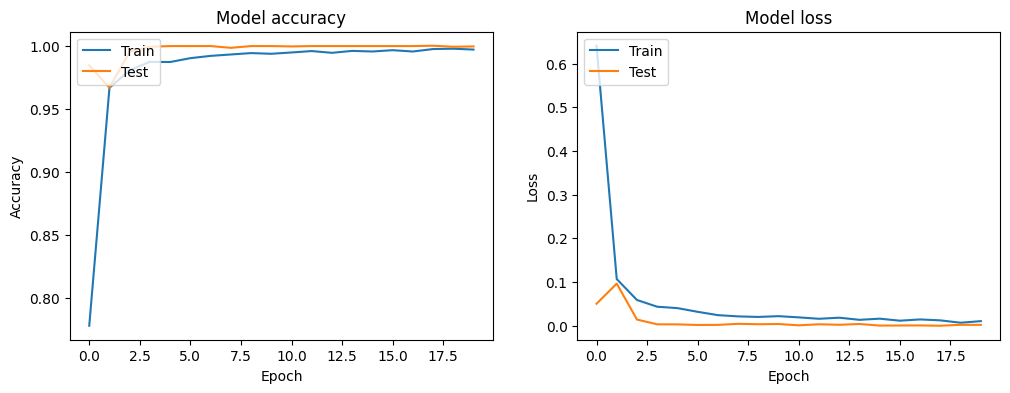

113/113 [==============================] - 1s 11ms/step


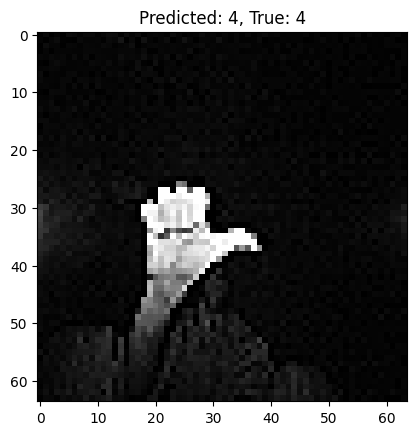

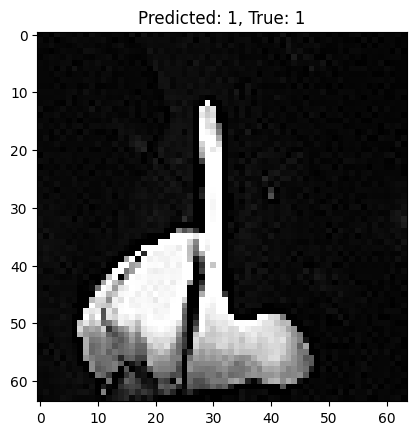

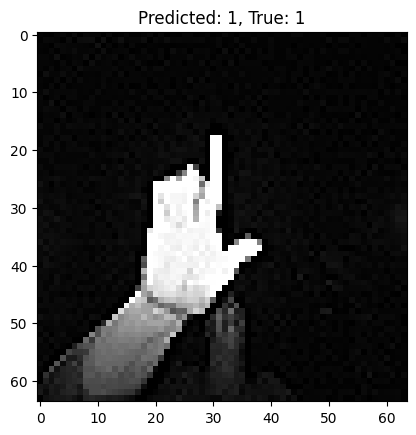

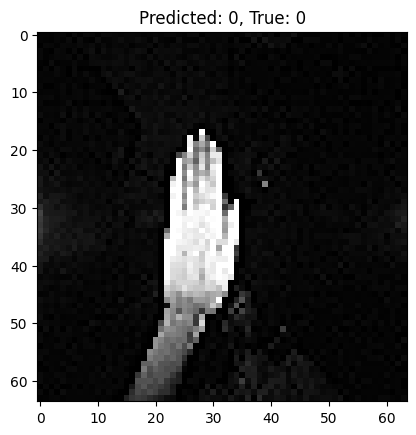

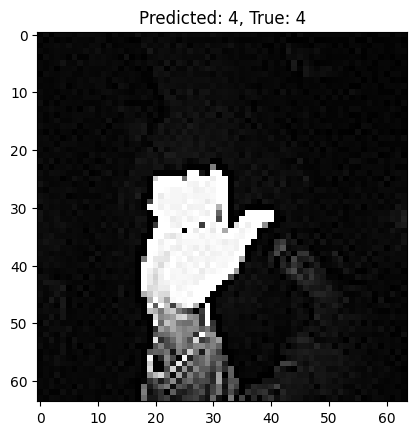

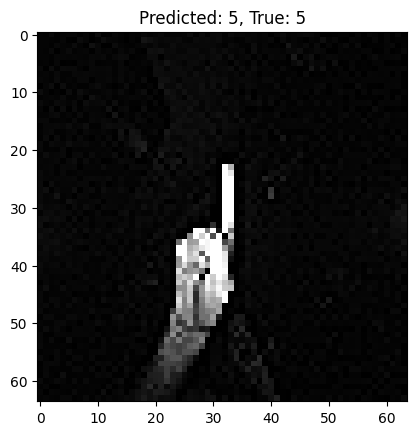

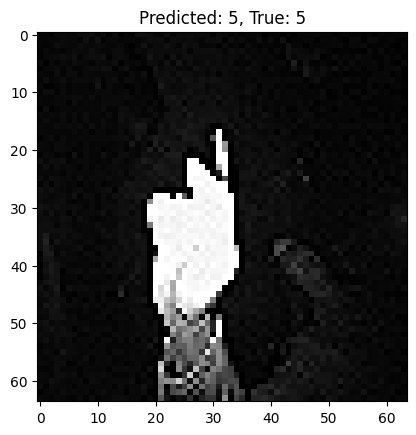

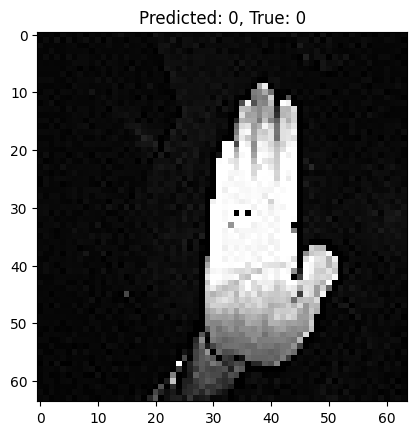

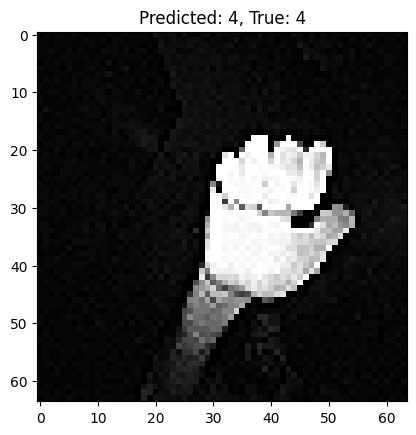

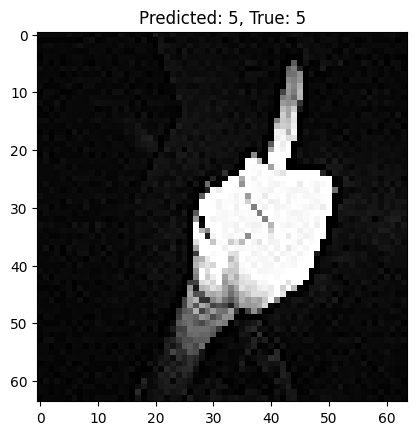

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

dataset_path = r'E:\PRODIGY INTERNSHIP\TASK 4\DATA\leapGestRecog'

images = []
labels = []

gesture_mapping = {
    '01_palm': 0,
    '02_l': 1,
    '03_fist': 2,
    '04_f': 3,
    '05_thumb': 4,
    '06_index': 5,
    '07_ok': 6,
    '08_palm_moved': 7,
    '09_c': 8,
    '10_down': 9
}

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    for gesture_folder in os.listdir(folder_path):
        gesture_folder_path = os.path.join(folder_path, gesture_folder)
        if gesture_folder in gesture_mapping:
            label = gesture_mapping[gesture_folder]
            for file in os.listdir(gesture_folder_path):
                if file.endswith('.png'):
                    image_path = os.path.join(gesture_folder_path, file)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(image, (64, 64))  # Resize images to 64x64
                    image = cv2.filter2D(image, -1, kernel)  # Apply sharpening
                    images.append(image)
                    labels.append(label)

images = np.array(images)
labels = np.array(labels)

images = images / 255.0

images = images.reshape(-1, 64, 64, 1)

labels = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 classes for 10 gestures

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

for i in range(10):
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}, True: {true_classes[i]}')
    plt.show()
